In [2]:
import os
import numpy as np
from glob import glob
import pandas as pd
import polars as pl
from natsort import natsorted

In [8]:
natsorted(glob('data/*125.csv'))[:1]

['data/vm_cpu_readings-file-1-of-125.csv']

In [4]:
zipped = sorted(glob('data/*.gz'))
for path in zipped:
    print(path)
    os.system(f'gunzip {path}')
    # os.remove(path)

data/vm_cpu_readings-file-26-of-125.csv.gz
data/vm_cpu_readings-file-27-of-125.csv.gz
data/vm_cpu_readings-file-28-of-125.csv.gz
data/vm_cpu_readings-file-29-of-125.csv.gz
data/vm_cpu_readings-file-30-of-125.csv.gz
data/vm_cpu_readings-file-31-of-125.csv.gz
data/vm_cpu_readings-file-32-of-125.csv.gz
data/vm_cpu_readings-file-33-of-125.csv.gz
data/vm_cpu_readings-file-34-of-125.csv.gz
data/vm_cpu_readings-file-35-of-125.csv.gz
data/vm_cpu_readings-file-36-of-125.csv.gz
data/vm_cpu_readings-file-37-of-125.csv.gz
data/vm_cpu_readings-file-38-of-125.csv.gz
data/vm_cpu_readings-file-39-of-125.csv.gz
data/vm_cpu_readings-file-40-of-125.csv.gz
data/vm_cpu_readings-file-41-of-125.csv.gz
data/vm_cpu_readings-file-42-of-125.csv.gz
data/vm_cpu_readings-file-43-of-125.csv.gz
data/vm_cpu_readings-file-44-of-125.csv.gz
data/vm_cpu_readings-file-46-of-125.csv.gz
data/vm_cpu_readings-file-47-of-125.csv.gz
data/vm_cpu_readings-file-48-of-125.csv.gz
data/vm_cpu_readings-file-49-of-125.csv.gz
data/vm_cpu


gzip: data/vm_cpu_readings-file-61-of-125.csv.gz: invalid compressed data--format violated


# Filter out short-lived VMs

In [28]:
sigmoid = lambda x, y: y / (y + np.exp(x / y))

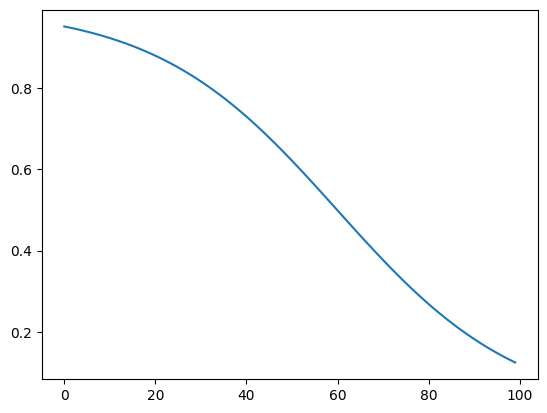

In [29]:
import matplotlib.pyplot as plt
plt.plot([sigmoid(x, 20) for x in range(0, 100)])

In [2]:
import pandas as pd
vm_table = pd.read_csv('data/vmtable.csv')
vm_table.columns = [content.split(',')[2] for content in open('data/schema.csv').readlines() if content.startswith('vmtable')]
print(vm_table.shape)
vm_table.head()

(2013766, 11)


,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count,vm memory (gb)
0,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75
1,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75
2,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00
3,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75
4,n77nP00/UpJmT+Yx1ZkDphvAqPoHU8yUpDCwyUtPNlRENq...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.448473,34.174012,98.553018,Delay-insensitive,8,56.00


In [4]:
vm_long = vm_table[(((vm_table['timestamp vm deleted'] - vm_table['timestamp vm created']) / 300) >= 60*24)]

In [7]:
vm_long[' id'].nunique()

5361

array([ 1,  8,  4,  2, 16])

In [11]:
vm_long.groupby('vm virtual core count')['vm memory (gb)'].unique()

vm virtual core count
1            [0.75, 1.75, 2.0]
2       [3.5, 14.0, 4.0, 16.0]
4       [28.0, 7.0, 8.0, 32.0]
8     [56.0, 14.0, 16.0, 64.0]
16                     [112.0]
Name: vm memory (gb), dtype: object

In [5]:
vm_long
# vm id emb, sub id emb, deployment id, vm category, cores, memory

,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count,vm memory (gb)
0,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75
2,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00
3,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75
4,n77nP00/UpJmT+Yx1ZkDphvAqPoHU8yUpDCwyUtPNlRENq...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.448473,34.174012,98.553018,Delay-insensitive,8,56.00
6,uSkGH3DS6BVo3RFnw3GZb6WCFSmGgvgKi4HIj08yxO4f5l...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.276369,1.350084,23.450372,Delay-insensitive,8,56.00
...,...,...,...,...,...,...,...,...,...,...,...
2013759,0W/GXlz86P16T19SjjSyOkJbNT71qnSvJAZODSxxC0snQt...,3KYB4oZzTGz1Kjr8DX8pqMZLgmbsH4Z4xoqs/RNyrgmmvi...,fYha54PSPDfjrdfBxH5tFmCtCT+IINY3rsgPegEBQj03If...,0,2591700,100.000000,3.167739,18.926554,Interactive,2,3.50
2013760,NcEsLNFOZQiuD2uvyFpaOC7FJXIDBqqrTh9pAiHstZBQT6...,3KYB4oZzTGz1Kjr8DX8pqMZLgmbsH4Z4xoqs/RNyrgmmvi...,fYha54PSPDfjrdfBxH5tFmCtCT+IINY3rsgPegEBQj03If...,0,2591700,99.324290,3.156083,17.963647,Interactive,2,3.50
2013763,1UHZb9fC7yztxXgW4DP/Mnmco/krJrwESOgda4BqX+4nMF...,qmftcYuQnjoTysaaE0UGTDh+KioEXTVzK/aPqbh74eoVbB...,8VEV+1xHOwGOUTmt4MohluwLOR4L3/Uk++pnDlxJHTreVL...,0,2591700,95.777730,3.045443,16.363130,Delay-insensitive,2,3.50
2013764,WVoXuJYE6oPeR38v6zEyL8etSyCP32UM7JSrv1TWmgdl7e...,qmftcYuQnjoTysaaE0UGTDh+KioEXTVzK/aPqbh74eoVbB...,8VEV+1xHOwGOUTmt4MohluwLOR4L3/Uk++pnDlxJHTreVL...,0,2591700,95.382941,3.250271,16.323874,Interactive,2,3.50


In [28]:
vm_long = vm_table[(((vm_table['timestamp vm deleted'] - vm_table['timestamp vm created']) / 300) >= 60)]
vm_long

,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count,vm memory (gb)
0,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75
1,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75
2,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00
3,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75
4,n77nP00/UpJmT+Yx1ZkDphvAqPoHU8yUpDCwyUtPNlRENq...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.448473,34.174012,98.553018,Delay-insensitive,8,56.00
...,...,...,...,...,...,...,...,...,...,...,...
2013761,MFGSZRXj8oVpSHz8Tt8Um+XymbdZLJSpI/OmNe5Pp9+rEn...,3KYB4oZzTGz1Kjr8DX8pqMZLgmbsH4Z4xoqs/RNyrgmmvi...,fYha54PSPDfjrdfBxH5tFmCtCT+IINY3rsgPegEBQj03If...,1037700,1096800,82.058417,2.492943,28.357228,Unkown,4,7.00
2013762,MoaiaXcKdv5SjaGMAWYvkWGsaVrBxcx7jQlSZqJdxNPCHO...,3KYB4oZzTGz1Kjr8DX8pqMZLgmbsH4Z4xoqs/RNyrgmmvi...,fYha54PSPDfjrdfBxH5tFmCtCT+IINY3rsgPegEBQj03If...,1037700,1096800,87.611610,2.484453,20.905861,Unkown,4,7.00
2013763,1UHZb9fC7yztxXgW4DP/Mnmco/krJrwESOgda4BqX+4nMF...,qmftcYuQnjoTysaaE0UGTDh+KioEXTVzK/aPqbh74eoVbB...,8VEV+1xHOwGOUTmt4MohluwLOR4L3/Uk++pnDlxJHTreVL...,0,2591700,95.777730,3.045443,16.363130,Delay-insensitive,2,3.50
2013764,WVoXuJYE6oPeR38v6zEyL8etSyCP32UM7JSrv1TWmgdl7e...,qmftcYuQnjoTysaaE0UGTDh+KioEXTVzK/aPqbh74eoVbB...,8VEV+1xHOwGOUTmt4MohluwLOR4L3/Uk++pnDlxJHTreVL...,0,2591700,95.382941,3.250271,16.323874,Interactive,2,3.50


In [3]:
cpu_readings = glob('data/vm_cpu*125.csv')

df_list = []
for path in cpu_readings:
    df = pl.read_csv(path, has_header=False)
    df_list.append(df)

In [ ]:
for i in range(len(df_list)):
    df_list[i].head()

In [4]:
a = [content.split(',')[2] for content in open('data/schema.csv').readlines() if content.startswith('vm_cpu_readings')]

In [5]:
df = pd.read_csv('/scratch/lhk/cpu_readings/val/vm_cpu_readings-file-25-of-125-val.csv')
df.columns = a

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 1))

In [9]:
df.head()

,timestamp,vm id,min cpu,max cpu,avg cpu
0,503100,vg5+94ZGs3PVAxPMQ6RKoAxXWtUWQ7jIw071IniSFXAaju...,8.471984,61.711129,23.678049
1,503100,w+V1CAMLpBpKXeiYMaass7DbFTsfLOw40XT6PIm7Dfk9v9...,0.140804,1.154416,0.323435
2,503100,uF3dtQfT0yiWyRDx5hGI99kSeIlxHKBo80IjUSRWWOKHvB...,0.072138,23.117004,2.060708
3,503100,tyBv/1QPMD3JgjnmJQ35kn3f1AXTYsb4oqbILlUDo+haUh...,15.037561,31.804374,22.737825
4,503100,uvfQTDNaDUJm3A+pl5+VJQe51eQ1LPETYJzdCG+ctKcQAb...,3.124740,7.872903,4.481895


In [11]:
df['avg cpu']

0         23.678049
1          0.323435
2          2.060708
3         22.737825
4          4.481895
            ...    
995108     2.809734
995109     5.399797
995110     4.633553
995111    95.132588
995112    32.321766
Name: avg cpu, Length: 995113, dtype: float64

In [14]:
df[['avg cpu']].fillna(0)

,avg cpu
0,0.236780
1,0.003234
2,0.020607
3,0.227378
4,0.044819
...,...
995108,0.028097
995109,0.053998
995110,0.046336
995111,0.951326


In [13]:
df['avg cpu'] = scaler.fit_transform(df[['avg cpu']])
df.head()


,timestamp,vm id,min cpu,max cpu,avg cpu
0,503100,vg5+94ZGs3PVAxPMQ6RKoAxXWtUWQ7jIw071IniSFXAaju...,8.471984,61.711129,0.236780
1,503100,w+V1CAMLpBpKXeiYMaass7DbFTsfLOw40XT6PIm7Dfk9v9...,0.140804,1.154416,0.003234
2,503100,uF3dtQfT0yiWyRDx5hGI99kSeIlxHKBo80IjUSRWWOKHvB...,0.072138,23.117004,0.020607
3,503100,tyBv/1QPMD3JgjnmJQ35kn3f1AXTYsb4oqbILlUDo+haUh...,15.037561,31.804374,0.227378
4,503100,uvfQTDNaDUJm3A+pl5+VJQe51eQ1LPETYJzdCG+ctKcQAb...,3.124740,7.872903,0.044819


In [12]:
df.sort_values(['vm id', 'timestamp'])

,timestamp,vm id,min cpu,max cpu,avg cpu
24581,503400,+++4N8vwOp+Kw7rnCGJpp9HC0bv4YskWmoXkBn7hK5pQGK...,0.105967,26.853400,4.854954
169348,503700,+++4N8vwOp+Kw7rnCGJpp9HC0bv4YskWmoXkBn7hK5pQGK...,0.022136,26.512814,2.967031
313958,504000,+++4N8vwOp+Kw7rnCGJpp9HC0bv4YskWmoXkBn7hK5pQGK...,0.101946,16.712525,2.765864
458429,504300,+++4N8vwOp+Kw7rnCGJpp9HC0bv4YskWmoXkBn7hK5pQGK...,0.025466,15.936047,1.155795
599489,504600,+++4N8vwOp+Kw7rnCGJpp9HC0bv4YskWmoXkBn7hK5pQGK...,0.099568,15.925551,2.119307
...,...,...,...,...,...
9298835,522300,zzz/dAp2EG+GDcLw4BwALxWbgjEwrYOyKLvywQDtA305kF...,1.203085,7.867537,4.561503
9445502,522600,zzz/dAp2EG+GDcLw4BwALxWbgjEwrYOyKLvywQDtA305kF...,1.526573,7.627998,4.873691
9576121,522900,zzz/dAp2EG+GDcLw4BwALxWbgjEwrYOyKLvywQDtA305kF...,3.457772,8.217653,4.948545
9721407,523200,zzz/dAp2EG+GDcLw4BwALxWbgjEwrYOyKLvywQDtA305kF...,2.380704,9.866058,4.716718


In [31]:
df[df['vm id'].isin(vm_long['vm id'])]

,timestamp,vm id,min cpu,max cpu,avg cpu
0,503100,vt5QfZVcsxA0T2jTkzXuVCm0MvKBDCSRwXs6CZ4UV/KLlN...,1.070377,6.699324,4.511553
1,503100,tnBtsYshSNTnX5u5oEFn7b3U7IAaulpCelvwZcP6pBV6aA...,0.149195,2.348188,0.868549
2,503100,vwMEEVF6jt8u512Otyaw4hEXQDYV4Zm5pjTho21VK2cLSG...,3.643640,13.011666,6.700136
3,503100,v06fT0WEDCBWJekjqfa8vXEJJa0DurFuIsImDlMb54xBW2...,0.253753,99.182433,25.079176
4,503100,weGoVLA3GLgmEaW/5y9DKQTWhlcs224G0qTMUoGVnwhz7f...,2.784281,31.355002,10.927295
...,...,...,...,...,...
9999994,523800,nLXWw1Jv53FqY5x9PfChCMacW0TCuuaNGTyEdQhgoWNKAC...,3.449083,12.546237,6.010918
9999995,523800,thnU4dRA5Wb9bp0LiPRoTpWbu1kWUeP2X/naHMv7cy8Pa5...,6.314455,8.830841,7.372828
9999996,523800,sXZ7qEPqBdUNbNjkrndvfeKu32PeaU73lDxh/aMUT6kamm...,3.280879,5.309420,3.907067
9999997,523800,qkCAis1xEYZo1RoE/IlKTZ+r8Xt6/iWnZA4dzGBgM9PJC8...,3.222533,5.017939,3.795281


In [9]:
df.shape

(9999999, 5)

In [11]:
df['timestamp'].nunique()

72

In [12]:
df.head()

,timestamp,vm id,min cpu,max cpu,avg cpu
0,21000,jX+l+6KyENIjUls2xo1hfHgswnIb+odiW8O8cnUCEDgjMn...,2.998676,34.716643,7.888491
1,21000,hUgkAZ1yIFuiry7fA9KHjY4uRPVETFNGTcq1TeZeSD91DT...,2.900732,48.581511,16.226454
2,21000,jhdxmeolVH9yBwbBFDFxBTMBgnu3cgmP2USpFA2X0NHa2a...,2.949930,6.818615,4.039858
3,21000,efWn5J2FyxlU+uTRtOC+ZpN88xl21Te3DpdebOgUNX5lpD...,1.847758,7.923823,3.337690
4,21000,eolDHwQI3qTwgOG/lIsuecImBEcB6sNAS6/xkNJE7RriAM...,1.767465,3.529403,2.633946


In [16]:
b = df.groupby('vm id')

In [17]:
b.sort_values()

vm id
cu/Rl/jQ+tUyp4pVtPOerOycDmL9bawoePzI20Mk7+2RzMgOIOXrK2rVnpzPyxGK     1
Io135NELkpUm0wiyK6ePksAoR6zlUxNS+rQ3h8hWBbOmbg2JG8MbQzPcZXl1O0wm     1
sMAczrhKRWNhFYG77us4uV6XARz5ibsLgQo2c5rult2HxhaGQUGDHZab8I6hDZjR     1
X7wN8+McUJH+RiT/4GXe/6P7t+2L7w+VOzbIiZ2j1HnrtZyrX9Nc/EP2JOMMJld8     1
wSCYF9VZWYR4Ak7DavFyl2YlZTQ4eUlw4w4e+jApxdXR5CmiB2GcxOLA9HJHM/7b     1
                                                                    ..
ohFLOvHJQQxm8Fi1nRllXBbLgvLf1tg/E0FA1me2eBotChx/zKGH9/zpSXyc4cmf    74
JvMAD2YRM3W1pPn6Vh+8IZrWQZAqK8eDHepEDCi13C812BcGwj9URELX9SYs6pid    75
DX5Vlm6o5g5lU509+vkB4LgNg0+nKoF04HyNwAcbLulIExkT7rSsaygopw/XLbmf    75
7I9o3KHYtl8xWVs6/tcQlbOT38rk1+ZYyq/1u2AksNMeUYUZwtxhMGXzuKwFlC3n    75
AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd07p+OTACwtmgvdI6Ih    75
Name: timestamp, Length: 151258, dtype: int64

In [27]:
df[df['vm id'] == 'AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd07p+OTACwtmgvdI6Ih']

,timestamp,vm id,min cpu,max cpu,avg cpu
480961,22200,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,0.327322,4.210308,1.882500
625811,22500,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,0.918880,7.687001,2.004974
625936,22500,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,0.437106,7.490244,2.510946
626045,22500,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,0.290310,15.107453,2.048277
626164,22500,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,0.361333,3.791691,1.777573
...,...,...,...,...,...
9392425,41100,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,0.917481,4.804551,2.022435
9534474,41400,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,0.850067,4.297762,1.940384
9670732,41700,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,1.023383,4.375795,1.873817
9817320,42000,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,1.290453,3.050957,1.932959


In [29]:
df.groupby(['timestamp', 'vm id']).mean().reset_index()

,timestamp,vm id,min cpu,max cpu,avg cpu
0,21000,ZFKc5b8n5Ap1sIVeS53nvxOzLeVopOC9iFae813I5jN20r...,0.155190,2.431009,0.575146
1,21000,ZFOYtQcEe9WgrEFa2k3lxSBEpnObvjMEB0/zNHBO0tDXaH...,3.390098,5.720039,4.291576
2,21000,ZLNcgLA5AT2GD2a/U4ksBqKVBPACJcpmUunlo0RsEHHUsw...,4.743890,8.725993,7.041341
3,21000,ZLP8PU+JSl2GoQvmDFtK9ADRlwGtxV6iCmQ31nsxCST9WT...,0.090589,4.009979,0.489423
4,21000,ZW/SNaZpDnwud+9aR9S+4hgr5u7VB0K99YECb9+iYY4q08...,3.742027,11.834669,5.182982
...,...,...,...,...,...
9999917,42300,aiwtq7YUGNCP4QllP/2BffiFs3z1yIaPLuIN675AvGW0ip...,3.376988,6.078848,4.144022
9999918,42300,al0mMF3/hcAQrchhplshZuEzJrs0eF1QE1TRX2f4iIcY80...,5.970771,20.211695,13.294821
9999919,42300,amEOjfAXmMVoM2B2c9cd1ClGia1WapbipjfszEPmQBaqv2...,2.602241,5.923963,3.955276
9999920,42300,ao/S8aeyXXF/rW7jvM2Vy6l2H+sqlmeCJ06SDedFhkjeie...,0.641976,83.814873,12.980783


In [ ]:
'''
1. baseline models
2. process data -> filtering out short lived vms, group by time & id
3. Dataset class
    train_dev_test_split
    id -> one hot
    time -> normalize / one hot -> embedding
    normalize cpu
    dataloader
4. train model
5. evaluate
6. report
'''
# 1-8 10-18
# 10 10 10
# 8 1 1


In [ ]:
import torch
# input format: [timestamp_emb ; torch.nn.Embedding(2000000, 512) ; min cpu t-1; max cpu t-1 ; avg cpu t-1; vm type ; cores ; memory]
# batch: batch_size, seq_input -> (n timestamps, input_dim)

In [25]:
df.select('column_2').to_series().value_counts().sort(by = 'counts')

column_2,counts
str,u32
"""7Fzx0ifwdAksGs…",1
"""h/NRgSI72nmQwD…",1
"""WUvrX/K1NZj/e4…",1
"""jkyeqC8Y0UxMGT…",1
"""QAA2fBT8nIcrex…",1
"""qmQxKxdqEaiagA…",1
"""5GkSN7pZhvjq5n…",1
"""13eF7ly1VeI3Ek…",1
"""44S25y+5+8qXpQ…",1


In [31]:
vm_table['vm category'].value_counts()

Unkown               1172597
Delay-insensitive     780487
Interactive            60682
Name: vm category, dtype: int64

In [22]:
vm_table[vm_table['vm id'] == 'AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd07p+OTACwtmgvdI6Ih']

,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count,vm memory (gb)
1580488,AruZQj44rlY8d82FdOjE8S9Uct7qkMTFI6KO6k74yDALsd...,RYfnj8OTQ+/xa/cg+wV8j5D0BYL+chF8WD/tfSTQChA0jZ...,WBit/g6LEV6XWWVtRUDhJ7wI/Jg8TE2im2tIksgSR3UUm8...,0,2591700,97.258706,2.09434,14.031816,Delay-insensitive,4,7.0


In [30]:
[content.split(',')[2] for content in open('data/schema.csv').readlines() if content.startswith('vmtable')]

['vm id',
 'subscription id',
 'deployment id',
 'timestamp vm created',
 'timestamp vm deleted',
 'max cpu',
 'avg cpu',
 'p95 max cpu',
 'vm category',
 'vm virtual core count',
 'vm memory (gb)']

In [2]:
os.listdir('data')

['links.txt',
 'schema.csv',
 'category.txt',
 'cores.txt',
 'cpu.txt',
 'deployment.txt',
 'lifetime.txt',
 'memory.txt',
 'vm_cpu_readings-file-1-of-125.csv',
 'nohup.out',
 '.ipynb_checkpoints',
 'vm_cpu_readings-file-24-of-125.csv',
 'vm_cpu_readings-file-25-of-125.csv',
 'concat.csv',
 'vmtable.csv',
 'deployment.csv',
 'subscriptions.csv',
 'vm_cpu_readings-file-2-of-125.csv',
 'vm_cpu_readings-file-3-of-125.csv',
 'vm_cpu_readings-file-4-of-125.csv',
 'vm_cpu_readings-file-5-of-125.csv',
 'vm_cpu_readings-file-6-of-125.csv',
 'vm_cpu_readings-file-7-of-125.csv',
 'vm_cpu_readings-file-8-of-125.csv',
 'vm_cpu_readings-file-9-of-125.csv',
 'vm_cpu_readings-file-11-of-125.csv',
 'vm_cpu_readings-file-12-of-125.csv',
 'vm_cpu_readings-file-13-of-125.csv',
 'vm_cpu_readings-file-14-of-125.csv',
 'vm_cpu_readings-file-10-of-125.csv',
 'vm_cpu_readings-file-15-of-125.csv',
 'vm_cpu_readings-file-16-of-125.csv',
 'vm_cpu_readings-file-17-of-125.csv',
 'vm_cpu_readings-file-18-of-125.csv

In [3]:
with open('data/schema.csv', 'r') as f:
    schema = f.readlines()

In [4]:
schema

['filepattern,field_number,content,format\n',
 'subscriptions/subscriptions.csv.gz,1,subscription id,STRING_HASH\n',
 'subscriptions/subscriptions.csv.gz,2,timestamp first vm created,INTEGER\n',
 'subscriptions/subscriptions.csv.gz,3,count vms created,INTEGER\n',
 'deployment/deployment.csv.gz,1,deployment id,STRING_HASH\n',
 'deployment/deployment.csv.gz,2,deployment size,INTEGER\n',
 'vmtable/vmtable.csv.gz,1,vm id,STRING_HASH\n',
 'vmtable/vmtable.csv.gz,2,subscription id,STRING_HASH\n',
 'vmtable/vmtable.csv.gz,3,deployment id,STRING_HASH\n',
 'vmtable/vmtable.csv.gz,4,timestamp vm created,INTEGER\n',
 'vmtable/vmtable.csv.gz,5,timestamp vm deleted,INTEGER\n',
 'vmtable/vmtable.csv.gz,6,max cpu,DOUBLE\n',
 'vmtable/vmtable.csv.gz,7,avg cpu,DOUBLE\n',
 'vmtable/vmtable.csv.gz,8,p95 max cpu,DOUBLE\n',
 'vmtable/vmtable.csv.gz,9,vm category,STRING\n',
 'vmtable/vmtable.csv.gz,10,vm virtual core count,INTEGER\n',
 'vmtable/vmtable.csv.gz,11,vm memory (gb),DOUBLE\n',
 'vm_cpu_readings/v

# Label

In [3]:
import pandas as pd
df = pd.read_csv('./data/vmtable.csv', header = None)

In [5]:
a = [content.split(',')[2] for content in open('data/schema.csv').readlines() if content.startswith('vmtable')]
df.columns = a
df.head()

,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count,vm memory (gb)
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75


In [6]:
df.columns

Index(['vm id', 'subscription id', 'deployment id', 'timestamp vm created',
       'timestamp vm deleted', 'max cpu', 'avg cpu', 'p95 max cpu',
       'vm category', 'vm virtual core count', 'vm memory (gb)'],
      dtype='object')

In [7]:
df['avg cpu']

0           3.424094
1           6.181784
2           3.573635
3          16.287611
4           3.036038
             ...    
2013762     2.492943
2013763     2.484453
2013764     3.045443
2013765     3.250271
2013766     3.173619
Name: avg cpu, Length: 2013767, dtype: float64

In [9]:
def bin(score):
    if 0 <= score < 25:
        return 0
    elif 25 <= score < 50:
        return 1
    elif 50 <= score < 75:
        return 2
    else:
        return 3

In [11]:
df['avg cpu'].map(bin)

0    1614144
1     322609
2      68023
3       8991
Name: avg cpu, dtype: int64

In [12]:
df['avg_cpu_label'] = df['avg cpu'].map(bin)

In [21]:
df.to_csv('data/vmtable_cpu.csv', index = False)

In [22]:
df2 = pd.read_csv('data/vmtable_cpu.csv')

In [23]:
df2.head()

,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count,vm memory (gb),avg_cpu_label
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,0
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,0
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,0
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,0
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,0


In [1]:
import pandas as pd
pd.read_csv('/scratch/orwig/vmtable_new1.csv')

,Unnamed: 0,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count,vm memory (gb),stability
0,0,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,stable
1,1,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,stable
2,2,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,stable
3,3,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,stable
4,4,n77nP00/UpJmT+Yx1ZkDphvAqPoHU8yUpDCwyUtPNlRENq...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.448473,34.174012,98.553018,Delay-insensitive,8,56.00,stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,6Wxptt9lQqBjY/eiwLByHJH1YgaSX8YEmRNI7wMXesdAvq...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2073600,2074200,80.849942,12.045649,80.849942,Unkown,4,7.00,stable
99996,99996,I1rg+GKbXaf6u7dk5r53AejlqhmJ8FR1RrixROFzB+Xbms...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2062800,2063400,95.381670,20.045149,95.381670,Unkown,4,7.00,stable
99997,99997,bGXeOFPI0jCeR92dDthM8BYCOwnJ3GD4nh1ReSal6Ux2Fc...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2073300,2074200,95.604747,17.224030,95.604747,Unkown,4,7.00,stable
99998,99998,cZiq9MPq82sWhTrg8w8lkjUx8aEHnOBCjsNnYjdxzwqHp1...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2062500,2063400,71.416188,22.615014,71.416188,Unkown,4,7.00,stable
